In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def parse_mass_error(text: str) -> pd.DataFrame:
    """
    Looks for lines like:
      'Mass %error =       1.3333    0.05'
    where 1.3333 = decimal hours, 0.05 = mass percent error.

    Returns a DataFrame with columns:
      sim_hours (float), sim_time (HH:MM:SS), mass_percent_error (float)
    """
    pattern = re.compile(r"Mass %error\s*=\s*([0-9]*\.?[0-9]+)\s+([+-]?[0-9]*\.?[0-9]+)")
    records = []

    for m in pattern.finditer(text):
        hours = float(m.group(1))
        mass_err = float(m.group(2))
        total_seconds = int(round(hours * 3600))
        hh = total_seconds // 3600
        mm = (total_seconds % 3600) // 60
        ss = total_seconds % 60
        sim_time = f"{hh:01d}:{mm:02d}:{ss:02d}"
        records.append({
            "sim_hours": hours,
            "sim_time": sim_time,
            "mass_percent_error": mass_err
        })

    df = pd.DataFrame(records).sort_values("sim_hours").reset_index(drop=True)
    return df

In [3]:
def main():
    if not LOG_FILE.exists():
        raise FileNotFoundError(f"Input log file not found: {LOG_FILE.resolve()}")

    # Read the entire log (irrelevant lines are fine; they’ll be ignored)
    text = LOG_FILE.read_text(encoding="utf-8", errors="ignore")

    # Parse
    df = parse_mass_error(text)
    if df.empty:
        print("No 'Mass %error' entries found.")
        return

    # Save CSV
    df.to_csv(CSV_OUT, index=False)
    print(f"Saved CSV: {CSV_OUT.resolve()} ({len(df)} rows)")

    # Plot
    plt.figure(figsize=(9, 5))
    plt.plot(df["sim_hours"], df["mass_percent_error"], marker=".", color="#1f77b4")
    plt.title("Mass % error vs Simulation time")
    plt.xlabel("Simulation time (hours)")
    plt.ylabel("Mass % error")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(PNG_OUT, dpi=150)
    print(f"Saved plot: {PNG_OUT.resolve()}")

Saved CSV: C:\Users\HALDARR\OneDrive - Jacobs\Documents\FM API tools\mass_balance_chart\mass_error_vs_time.csv (289 rows)
Saved plot: C:\Users\HALDARR\OneDrive - Jacobs\Documents\FM API tools\mass_balance_chart\mass_error_vs_time.png


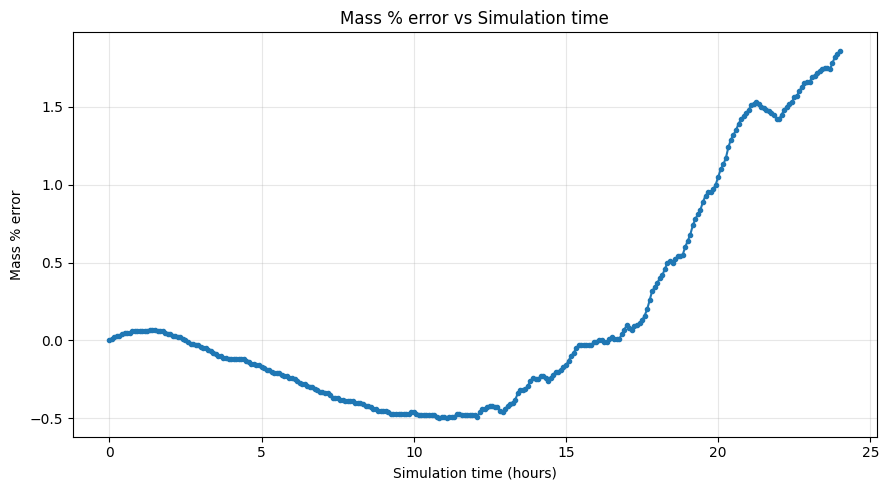

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Extract 'Mass %error' entries from tflog.txt and plot Mass % error vs Simulation time.

Input:
  - tflog.txt (same folder as this script)

Outputs:
  - mass_error_vs_time.csv
  - mass_error_vs_time.png
"""


LOG_FILE = Path("GMMC_SH_BLN_13p0hr_0100yr_026.lf1")
CSV_OUT = Path("mass_error_vs_time.csv")
PNG_OUT = Path("mass_error_vs_time.png")

if __name__ == "__main__":
    main()
